<a href="https://colab.research.google.com/github/KrRA1122/Machine-Learning-/blob/main/Medical_Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Medical Insurance Cost

Step 1: Read the train data

In [1]:
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Step 2: Perform Basic data quality checks|

In [2]:
import missingno as msng

<Axes: >

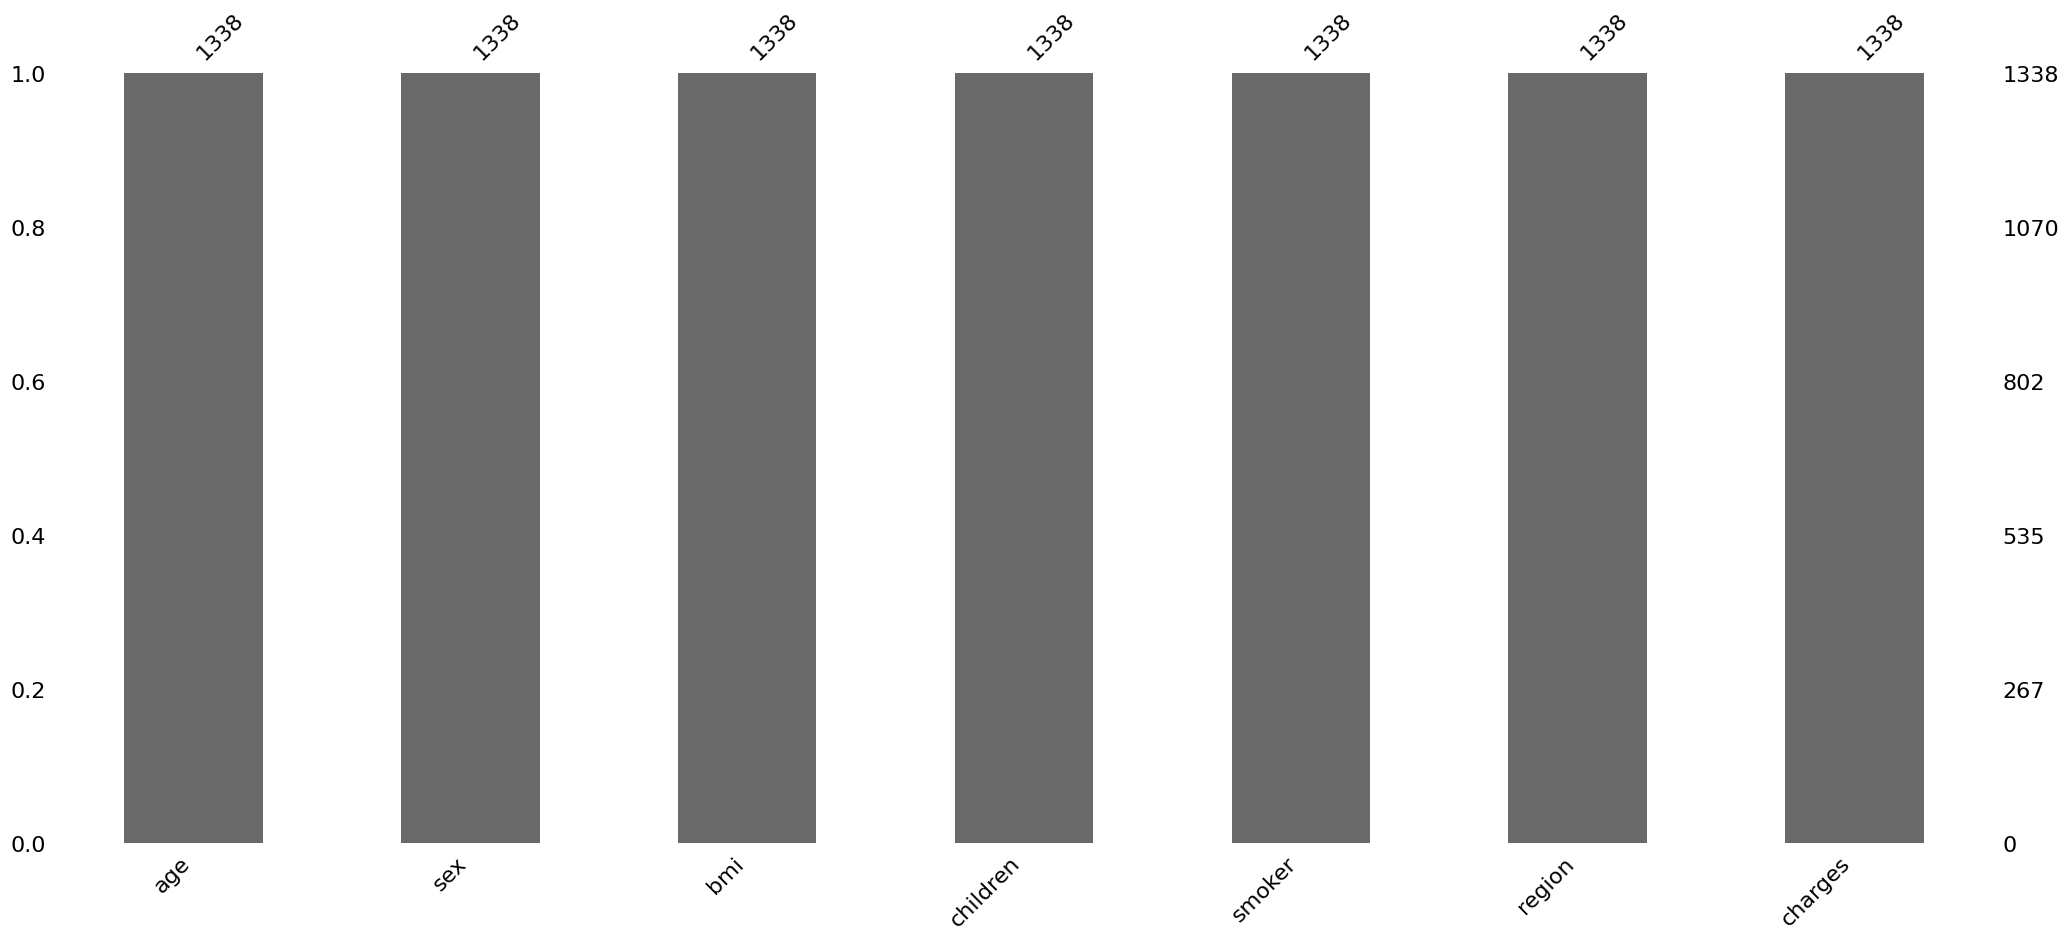

In [3]:
msng.bar(df) #graphical precentation of missing value

In [5]:
m=df.isna().sum()
m

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# number of rows and columns
df.shape

(1338, 7)

In [7]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#Categorical Features:



*   Sex
*   smoker
*   Region





In [12]:
df.duplicated().sum()

1

In [13]:
df.duplicated().sum()/len(df)

0.0007473841554559044

In [14]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

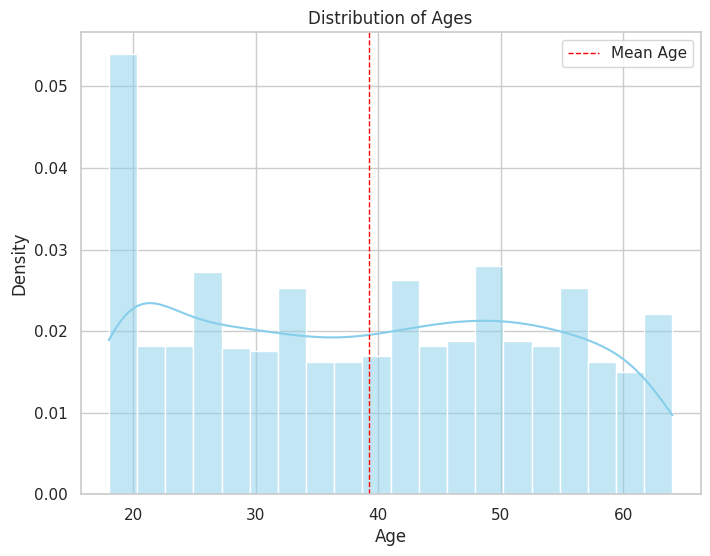

In [17]:
# distribution of age value
# Set Seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, color='skyblue', bins=20, stat='density')
plt.axvline(df['age'].mean(), color='red', linestyle='--', linewidth=1, label='Mean Age')#shows average age line
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend()
plt.show()

<ipython-input-20-29499614f4a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


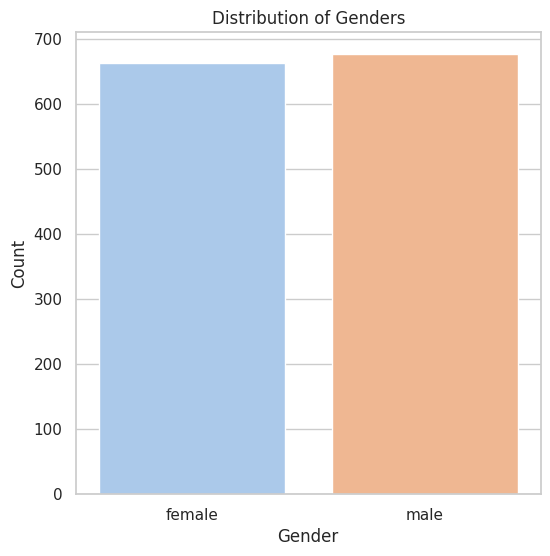

In [20]:
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=df, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.show()

In [21]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

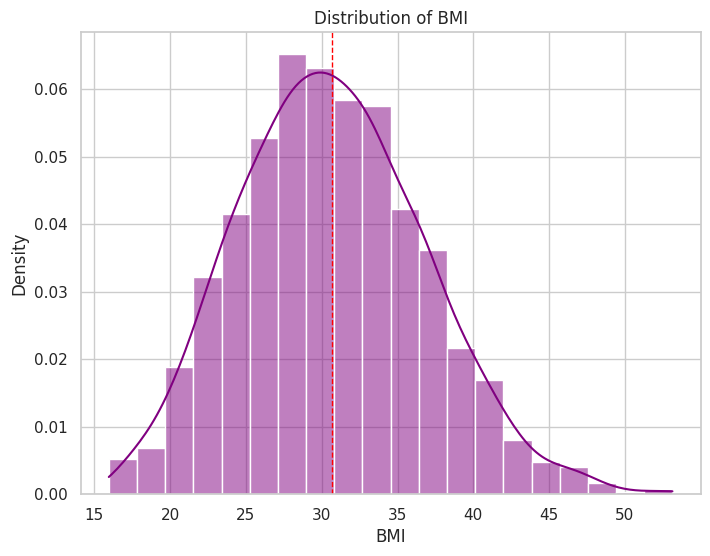

In [24]:
# Plot BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, color='purple', bins=20, stat='density')
plt.axvline(df['bmi'].mean(), color='red', linestyle='--', linewidth=1, label='Mean Age')#shows average BMI line
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Distribution of BMI')
plt.show()

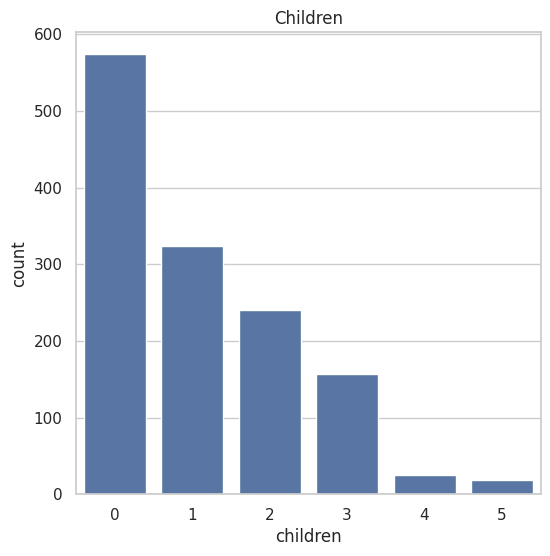

In [25]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [26]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

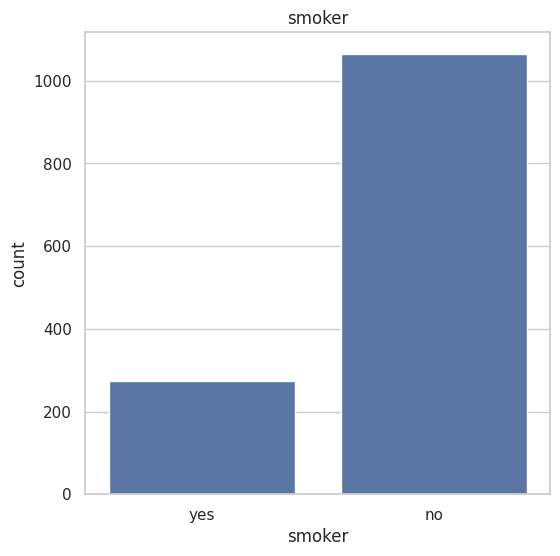

In [27]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [29]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

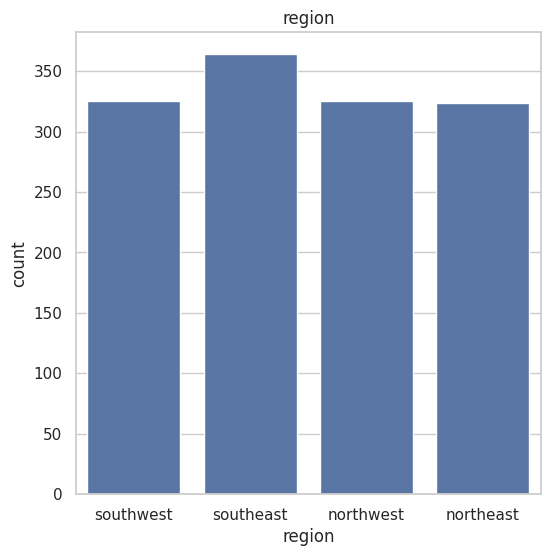

In [30]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [32]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Text(0, 0.5, 'Density')

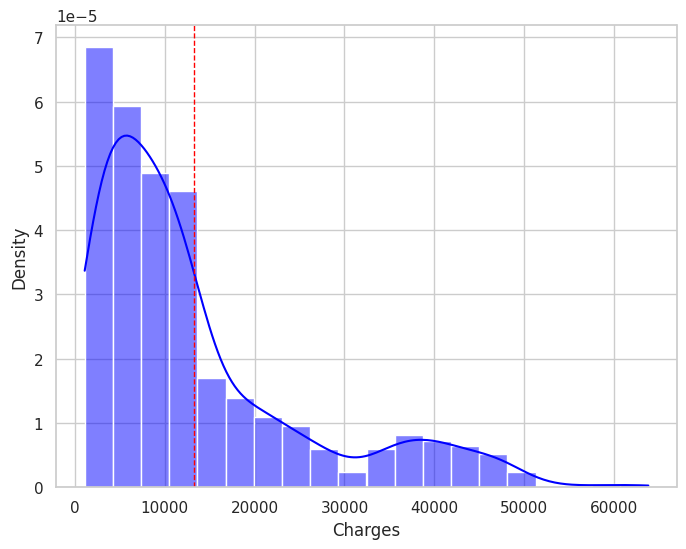

In [35]:
# Calculate average charge
average_charge = df['charges'].mean()

# Plot charges distribution with average line
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True, color='blue', bins=20, stat='density')
plt.axvline(average_charge, color='red', linestyle='--', linewidth=1, label='Average Charge')
plt.xlabel('Charges')
plt.ylabel('Density')

Step 3: Seperate X and Y(charges)

In [36]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [37]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [38]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Step 4: Perform Preprocessing on X

In [39]:
# Sep cat and con features
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [40]:
cat

['sex', 'smoker', 'region']

In [41]:
con

['age', 'bmi', 'children']

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [43]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [44]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


In [45]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')


In [46]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__age,num__bmi,num__children,cat__sex_female,cat__sex_male,cat__smoker_no,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Step 5: Perform train test split

In [47]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)


In [48]:
xtrain.head()

,num__age,num__bmi,num__children,cat__sex_female,cat__sex_male,cat__smoker_no,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
1225,-0.441948,1.502090,-0.078767,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
209,0.056461,1.733393,-0.078767,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1309,0.127662,0.252071,0.751079,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1075,-0.513149,-0.176085,-0.078767,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
711,0.768473,-1.168554,0.751079,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [49]:
ytrain.head()

1225     4795.6568
209      6610.1097
1309     6875.9610
1075     4562.8421
711     10107.2206
Name: charges, dtype: float64

In [50]:
xtrain.shape,xtest.shape

((1070, 11), (268, 11))

Step 6: Perform Algorithm evaluation

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [53]:
dct = {'Linear':LinearRegression(),
       'Decision Tree': DecisionTreeRegressor(),
       'Random Forest':RandomForestRegressor(),
       'Gradient Boost': GradientBoostingRegressor(),
       'SVR':SVR()}

In [54]:
dct.items()

dict_items([('Linear', LinearRegression()), ('Decision Tree', DecisionTreeRegressor()), ('Random Forest', RandomForestRegressor()), ('Gradient Boost', GradientBoostingRegressor()), ('SVR', SVR())])

In [55]:
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import cross_val_score

In [56]:
from warnings import filterwarnings
filterwarnings('ignore')

In [59]:

from warnings import filterwarnings
filterwarnings('ignore')

train = []
test = []
train_cv = []
for name, model in dct.items():
    # Fit the model on train data
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Calculate mean_squared_error score in train and test
    Mse_train = mean_squared_error(ytrain, ypred_train)
    Mse_test = mean_squared_error(ytest, ypred_test)
    # Calcualte mean_squared_error 5 fold cross validated score
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')
    Mse_cv = scores.mean()
    # Append all above values in list
    train.append(Mse_train)
    test.append(Mse_test)
    train_cv.append(Mse_cv)
    # Print the results
    print(f'Model Name : {name}\n')
    print(f'Train Mse : {Mse_train:.4f}')
    print(f'Test Mse : {Mse_test:.4f}')
    print(f'Train mse CV 5 Fold : {Mse_cv:.4f}')
    print('\n==================================================\n')


Model Name : Linear

Train Mse : 36404373.6257
Test Mse : 37026107.5477
Train mse CV 5 Fold : -37370026.7548


Model Name : Decision Tree

Train Mse : 73028.2314
Test Mse : 52706092.7271
Train mse CV 5 Fold : -41338284.3247


Model Name : Random Forest

Train Mse : 3224520.6772
Test Mse : 25533897.8958
Train mse CV 5 Fold : -23368118.4714


Model Name : Gradient Boost

Train Mse : 13236251.2277
Test Mse : 23999201.9546
Train mse CV 5 Fold : -20260008.9479


Model Name : SVR

Train Mse : 164496087.8776
Test Mse : 164858299.7148
Train mse CV 5 Fold : -164505663.7623




In [60]:
from warnings import filterwarnings
from sklearn.metrics import r2_score

filterwarnings('ignore')

train_r2 = []
test_r2 = []
train_cv_r2 = []

for name, model in dct.items():
    # Fit the model on train data
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Calculate R2 score for train and test
    r2_train = r2_score(ytrain, ypred_train)
    r2_test = r2_score(ytest, ypred_test)
    # Calculate R2 score using 5-fold cross-validation
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='r2')
    r2_cv = scores.mean()
    # Append all above values in list
    train_r2.append(r2_train)
    test_r2.append(r2_test)
    train_cv_r2.append(r2_cv)
    # Print the results
    print(f'Model Name : {name}\n')
    print(f'Train R2 Score : {r2_train:.4f}')
    print(f'Test R2 Score : {r2_test:.4f}')
    print(f'Train R2 Score CV 5 Fold : {r2_cv:.4f}')
    print('\n==================================================\n')


Model Name : Linear

Train R2 Score : 0.7544
Test R2 Score : 0.7333
Train R2 Score CV 5 Fold : 0.7467


Model Name : Decision Tree

Train R2 Score : 0.9995
Test R2 Score : 0.6048
Train R2 Score CV 5 Fold : 0.7236


Model Name : Random Forest

Train R2 Score : 0.9780
Test R2 Score : 0.8139
Train R2 Score CV 5 Fold : 0.8418


Model Name : Gradient Boost

Train R2 Score : 0.9107
Test R2 Score : 0.8269
Train R2 Score CV 5 Fold : 0.8633


Model Name : SVR

Train R2 Score : -0.1096
Test R2 Score : -0.1875
Train R2 Score CV 5 Fold : -0.1103




Save above results in dataframe

In [66]:
results_mse = {'name' : list(dct.keys()),
           'MSE Train': train,
           'MSE Test': test,
           'MSETrain CV': train_cv}

In [67]:
df_res_mse = pd.DataFrame(results_mse)
df_res_mse

,name,MSE Train,MSE Test,MSETrain CV
0,Linear,3.640437e+07,3.702611e+07,-3.737003e+07
1,Decision Tree,7.302823e+04,5.270609e+07,-4.133828e+07
2,Random Forest,3.224521e+06,2.553390e+07,-2.336812e+07
3,Gradient Boost,1.323625e+07,2.399920e+07,-2.026001e+07
4,SVR,1.644961e+08,1.648583e+08,-1.645057e+08


In [70]:
results_R2 = {'name' : list(dct.keys()),
           'R2 Train': train_r2,
           'R2 Test': test_r2,
           'R2 Train CV': train_cv_r2}

In [71]:
df_res_R2 = pd.DataFrame(results_R2)
df_res_R2


,name,R2 Train,R2 Test,R2 Train CV
0,Linear,0.754446,0.733305,0.746691
1,Decision Tree,0.999507,0.604830,0.723552
2,Random Forest,0.978038,0.813852,0.841844
3,Gradient Boost,0.910719,0.826873,0.863306
4,SVR,-0.109558,-0.187458,-0.110294


In [72]:
df_res_R2.sort_values(by='R2 Train CV', ascending=False)

,name,R2 Train,R2 Test,R2 Train CV
3,Gradient Boost,0.910719,0.826873,0.863306
2,Random Forest,0.978038,0.813852,0.841844
0,Linear,0.754446,0.733305,0.746691
1,Decision Tree,0.999507,0.604830,0.723552
4,SVR,-0.109558,-0.187458,-0.110294


For this dataset GradientBoostingRegressor performs best with higest cross validation score of 0.863306

In [73]:
#Gradient Boost

Build and evaluate GradientBoostingRegressor model

In [76]:
best_GBR = GradientBoostingRegressor()
best_GBR.fit(xtrain, ytrain)

GradientBoostingRegressor()

In [77]:
best_GBR.score(xtrain, ytrain)

0.9107189517622447

In [78]:
best_GBR.score(xtest, ytest)

0.8262695477079967

In [81]:
from sklearn.model_selection import GridSearchCV


# Define the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain, ytrain)

# Get the best model and its parameters
best_gbr = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
test_r2 = best_gbr.score(xtest, ytest)

print("Best Parameters:", best_params)
print("Test R2 Score:", test_r2)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Test R2 Score: 0.8388207173376031


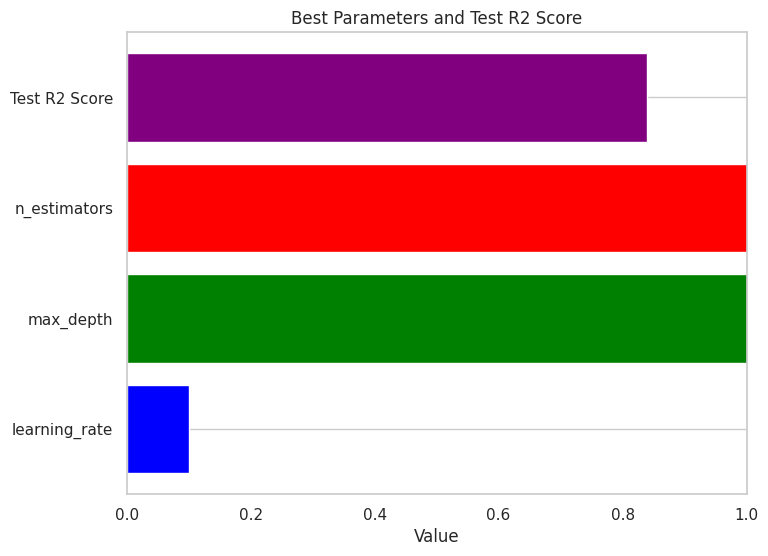

In [84]:
import matplotlib.pyplot as plt

# Extract best parameters and test R2 score
best_params = grid_search.best_params_
test_r2_score = test_r2

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.barh(y=['learning_rate', 'max_depth', 'n_estimators', 'Test R2 Score'],
         width=[best_params['learning_rate'], best_params['max_depth'], best_params['n_estimators'], test_r2_score],
         color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Value')
plt.title('Best Parameters and Test R2 Score')
plt.xlim(0, 1)  # Set x-axis limit to accommodate learning rate values
plt.grid(axis='x')
plt.show()


In [85]:
# Predict output using the best model
predictions = best_gbr.predict(xtest)

# Print the first few predictions
print("Predictions:", predictions[:5])


Predictions: [ 5333.10523536  5744.8989708  12812.5982322  21156.11474402
  8676.75687549]


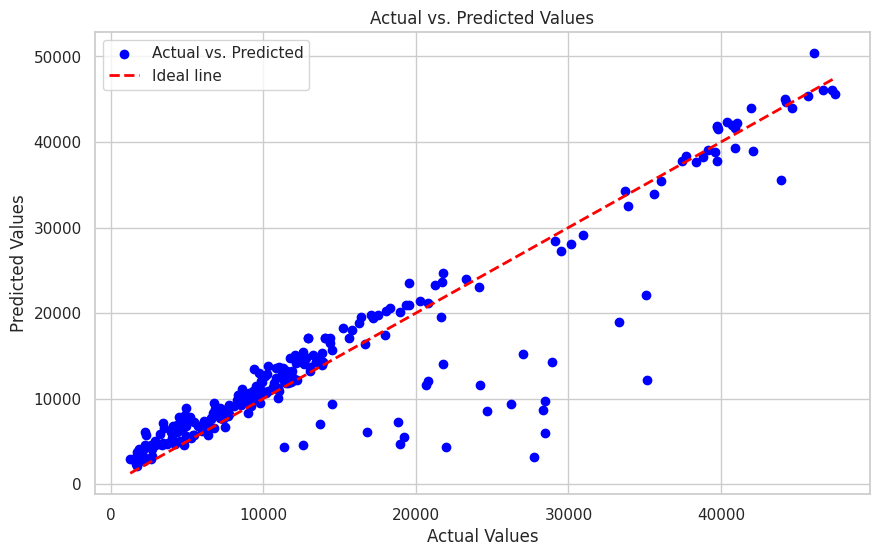

In [95]:


# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(ytest, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red', label='Ideal line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


#Good Predictions
The majority of data points fall close to the ideal line, indicating accurate predictions.
The model captures the underlying patterns well.